In [1]:
import os
os.chdir('../')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

In [5]:
waves_norm = np.load('/Volumes/OTHERS/Doktorat/Essen/debug_data/waves_norm.npy')

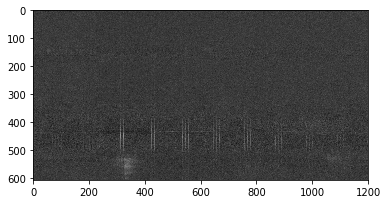

In [6]:
plt.imshow(waves_norm[:,560,:], cmap='gray', vmin=0, vmax=255)

In [153]:
test_slice = waves_norm[:,560,:]

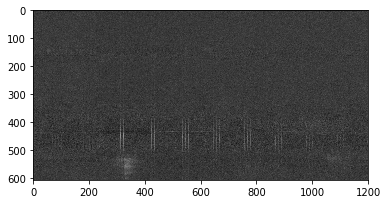

In [154]:
plt.imshow(test_slice, cmap='gray', vmin=0, vmax=255)

In [155]:
test_slice = test_slice.astype('uint8')

In [156]:
edges = cv.Canny(test_slice, 50, 130, apertureSize = 3)

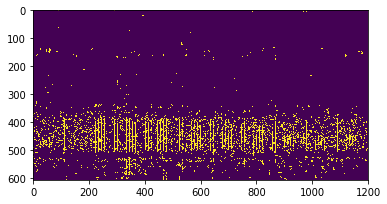

In [157]:
plt.imshow(edges)

In [134]:
blur = cv.blur(edges, (5,5))

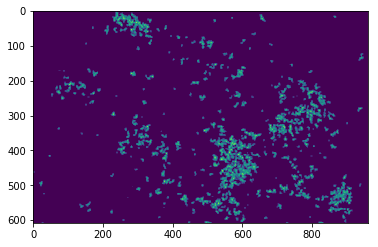

In [123]:
plt.imshow(blur)

In [114]:
blur.max()

184

In [ ]:
plt.imshow()

In [85]:
np.unique(edges)

array([  0, 255], dtype=uint8)

In [37]:
lines = cv.HoughLines(edges,1,np.pi/180, 200) 

In [31]:
lines.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
# Python program to illustrate HoughLine 
# method for line detection 
import cv2 
import numpy as np 
  
# Reading the required image in  
# which operations are to be done.  
# Make sure that the image is in the same  
# directory in which this python program is 
img = cv2.imread('image.jpg') 
  
# Convert the img to grayscale 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
  
# Apply edge detection method on the image 
edges = cv2.Canny(gray,50,150,apertureSize = 3) 
  
# This returns an array of r and theta values 
lines = cv2.HoughLines(edges,1,np.pi/180, 200) 
  
# The below for loop runs till r and theta values  
# are in the range of the 2d array 
for r,theta in lines[0]: 
      
    # Stores the value of cos(theta) in a 
    a = np.cos(theta) 
  
    # Stores the value of sin(theta) in b 
    b = np.sin(theta) 
      
    # x0 stores the value rcos(theta) 
    x0 = a*r 
      
    # y0 stores the value rsin(theta) 
    y0 = b*r 
      
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta)) 
    x1 = int(x0 + 1000*(-b)) 
      
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta)) 
    y1 = int(y0 + 1000*(a)) 
  
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta)) 
    x2 = int(x0 - 1000*(-b)) 
      
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta)) 
    y2 = int(y0 - 1000*(a)) 
      
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2). 
    # (0,0,255) denotes the colour of the line to be  
    #drawn. In this case, it is red.  
    cv2.line(img,(x1,y1), (x2,y2), (0,0,255),2) 
      
# All the changes made in the input image are finally 
# written on a new image houghlines.jpg 
cv2.imwrite('linesDetected.jpg', img)